# Devision of data based on gender

### Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Visualizing Data

In [14]:
# Making numpy arrays out of CSV file

file = pd.read_csv("01_heights_weights_genders.csv")
file = file.sample(frac=1)
data = np.array(file.values)

Y_train = ((data[:,0] == 'Male') * 1).reshape(1,10000)
X_train = data[:,1:].T.astype('float64')

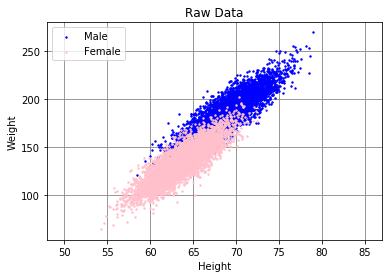

In [15]:
# Plotting raw data before fitting.



fig, ax = plt.subplots()
female = file[file['Gender'] == "Female"]
male = file[file['Gender'] == "Male"]

ax.scatter(male["Height"], male["Weight"],
           c='blue', alpha=1,
           s=2, label="Male")

ax.scatter(female["Height"], female["Weight"],
           c='pink', alpha=1,
           s=2, label="Female")
ax.grid(color='gray', alpha=1)
ax.set_axisbelow(True)
plt.xlim(48, 87)
plt.title("Raw Data")
plt.xlabel("Height")
plt.ylabel("Weight")
ax.legend(loc=2)

### Implementing Model block by block
    - Some functions like initialize and optimize will be same from the first question, So I didn't implement 
    them again

1. activation function

In [16]:
def initialize_with_zeros(dim):

    w = np.zeros(shape=(dim, 1))
    b = 0

    return w, b

In [17]:
def activation(z):
    
    s = (z > 0.5) * 1
    
    return s

2. Predict function which uses activation function and makes a prediction.

In [18]:
def predict(w, b, X):

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    A = activation(np.dot(w.T, X) + b)

    Y_prediction = (A > 0.5) * 1
    
    return Y_prediction

3. Propagatte function.

In [22]:
def propagate(w, b, X, y):

    m = int(X.shape[1])
    A = activation(np.dot(w.T,X) + b)
    cost = (1 / m) * np.sum(np.square(y - A))   
    
    dw = ( -2 / m) * np.dot(X,(y - A).T)
    db = ( -2 / m) * np.sum(y - A)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

### Implementing the whole model by putting all the blocks together

In [23]:
def model(X_train, Y_train, iterations, alpha):

    w, b = initialize_with_zeros(X_train.shape[0])
    

    parameters, grads, costs = optimize(w, b, X_train, Y_train, iterations, alpha)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_train = predict(w, b, X_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))

    d = {"costs": costs, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : alpha,
         "num_iterations": iterations}
    
    return d

In [25]:
def optimize(w, b, X, y, iterations, alpha):
    
    costs = []
    
    for i in range(iterations):
        
        grads, cost = propagate(w, b, X, y)
        
        dw = grads["dw"]
        db = grads["db"]
        

        w = w - alpha * dw
        b = b - alpha * db

        if i % 100 == 0:
            costs.append(cost)
        
        if i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

### Feeding the data to model

In [26]:
d = model(X_train, Y_train, iterations = 1000, alpha = 0.1)

Cost after iteration 0: 0.500000
Cost after iteration 100: 0.257000
Cost after iteration 200: 0.314800
Cost after iteration 300: 0.082000
Cost after iteration 400: 0.082200
Cost after iteration 500: 0.082200
Cost after iteration 600: 0.082500
Cost after iteration 700: 0.082200
Cost after iteration 800: 0.082100
Cost after iteration 900: 0.082100
train accuracy: 91.77 %


### Plotting the result

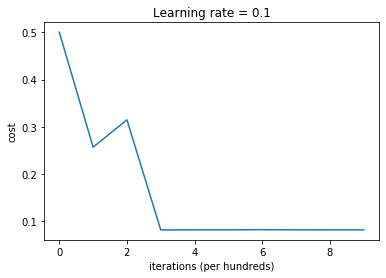

In [27]:
# Plotting the learning curve

costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate = " + str(d["learning_rate"]))
plt.show()

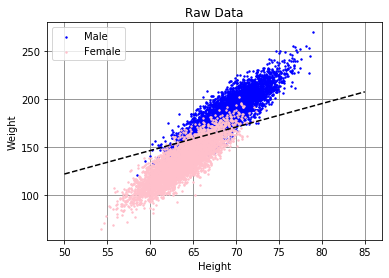

In [28]:
# Plotting the data with decision boundary

fig, ax = plt.subplots()
female = file[file['Gender'] == "Female"]
male = file[file['Gender'] == "Male"]

ax.scatter(male["Height"], male["Weight"],
           c='blue', alpha=1,
           s=2, label="Male")

ax.scatter(female["Height"], female["Weight"],
           c='pink', alpha=1,
           s=2, label="Female")
ax.grid(color='gray', alpha=1)
ax.set_axisbelow(True)
plt.xlim(48, 87)
plt.title("Raw Data")
plt.xlabel("Height")
plt.ylabel("Weight")
ax.legend(loc=2)

w = d['w']
b = d['b']
x_points = np.linspace(50, 85, 35)
y_ = -(w[0] * x_points + b) / w[1]
plt.plot(x_points, y_, 'k--')
plt.savefig("Q2.png")
plt.show()